# Uncertainty quantification plot
### Symbol

$m$: kg/s, mass flow

$T_i$: K, inlet temperature

### Uncertainty mode

L: low uncertainty, $\pm 10\%$ for $m$, $\pm 10\%$ for $T_i$

M: middle uncertainty, $\pm 30\%$ for $m$, $\pm 20\%$ for $T_i$  

H: high uncertainty, $\pm 50\%$ for $m$, $\pm 30\%$ for $T_i$  

### Random sampling mode:

norm: normal distribution

uniform: uniform distribution

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

### 1. Load data

In [20]:
ran_mode = "uniform"        # random sampling mode, "norm" or "uniform"
f_type = 0                  # f_type: 0 - parallel flow, 1 - counter flow
dpath = Path(f"../../py_data/HEXPractice/UQ/{ran_mode}")

if f_type == 0:
    df_mMTiL = pd.read_csv(f"{dpath}/mMTiL/parallel.csv", header=0)
    df_mMTiM = pd.read_csv(f"{dpath}/mMTiM/parallel.csv", header=0)
    df_mMTiH = pd.read_csv(f"{dpath}/mMTiH/parallel.csv", header=0)
    df_mLTiM = pd.read_csv(f"{dpath}/mLTiM/parallel.csv", header=0)
    df_mHTiM = pd.read_csv(f"{dpath}/mHTiM/parallel.csv", header=0)
elif f_type == 1:
    df_mMTiL = pd.read_csv(f"{dpath}/mMTiL/counter.csv", header=0)
    df_mMTiM = pd.read_csv(f"{dpath}/mMTiM/counter.csv", header=0)
    df_mMTiH = pd.read_csv(f"{dpath}/mMTiH/counter.csv", header=0)
    df_mLTiM = pd.read_csv(f"{dpath}/mLTiM/counter.csv", header=0)
    df_mHTiM = pd.read_csv(f"{dpath}/mHTiM/counter.csv", header=0)

    
days = df_mMTiM["Day"].to_numpy()

### 2.Make plots - constant middle uncertainty (M) for $m$

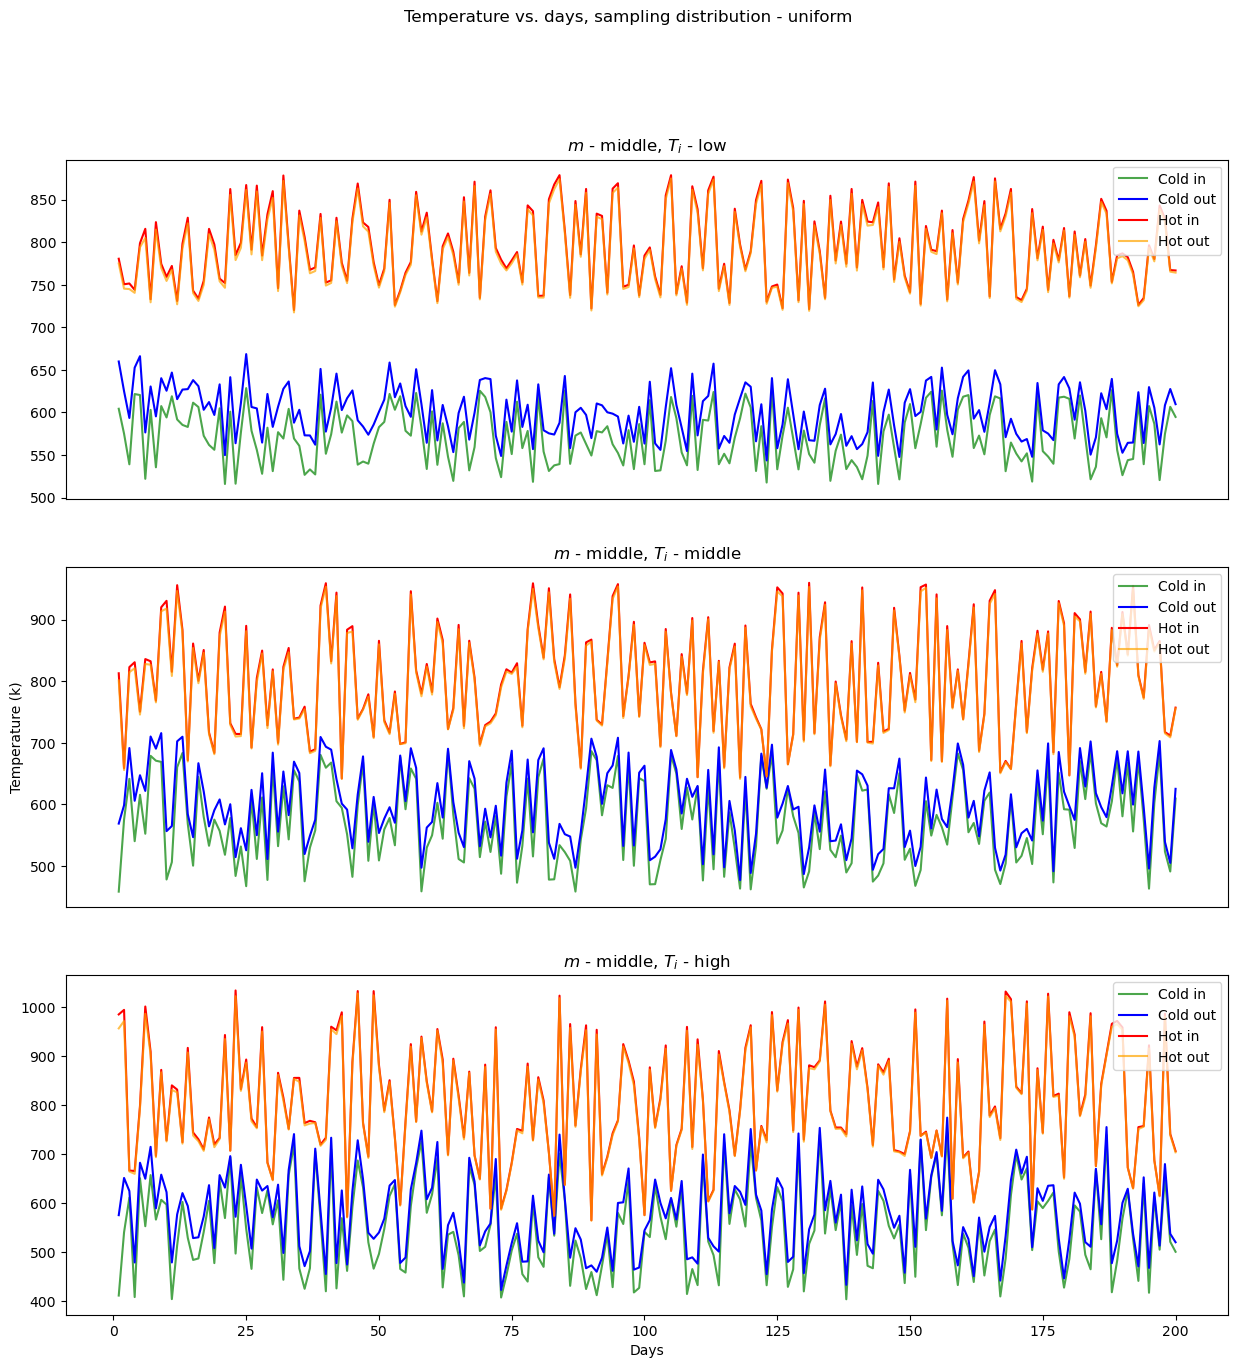

In [21]:
# Temperatures vs. time
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].plot(days, df_mMTiL["F1i"].to_numpy(), c="green", alpha = 0.7, label="Cold in")
ax[0].plot(days, df_mMTiL["F1o"].to_numpy(), c="blue", label="Cold out")
ax[0].plot(days, df_mMTiL["F2i"].to_numpy(), c="red", label="Hot in")
ax[0].plot(days, df_mMTiL["F2o"].to_numpy(), c="orange", alpha=0.7, label="Hot out")
ax[0].set_title("$m$ - middle, $T_{i}$ - low")
ax[0].set_xticks([])
ax[0].legend(loc="upper right")

ax[1].plot(days, df_mMTiM["F1i"].to_numpy(), c="green", alpha = 0.7, label="Cold in")
ax[1].plot(days, df_mMTiM["F1o"].to_numpy(), c="blue", label="Cold out")
ax[1].plot(days, df_mMTiM["F2i"].to_numpy(), c="red", label="Hot in")
ax[1].plot(days, df_mMTiM["F2o"].to_numpy(), c="orange", alpha=0.7, label="Hot out")
ax[1].set_title("$m$ - middle, $T_{i}$ - middle")
ax[1].set_xticks([])
ax[1].legend(loc="upper right")

ax[2].plot(days, df_mMTiH["F1i"].to_numpy(), c="green", alpha = 0.7, label="Cold in")
ax[2].plot(days, df_mMTiH["F1o"].to_numpy(), c="blue", label="Cold out")
ax[2].plot(days, df_mMTiH["F2i"].to_numpy(), c="red", label="Hot in")
ax[2].plot(days, df_mMTiH["F2o"].to_numpy(), c="orange", alpha=0.7, label="Hot out")
ax[2].set_title("$m$ - middle, $T_{i}$ - high")
ax[2].legend(loc="upper right")

ax[1].set_ylabel("Temperature (k)")
ax[2].set_xlabel("Days")

plt.suptitle(f'Temperature vs. days, sampling distribution - {ran_mode}')
plt.show()

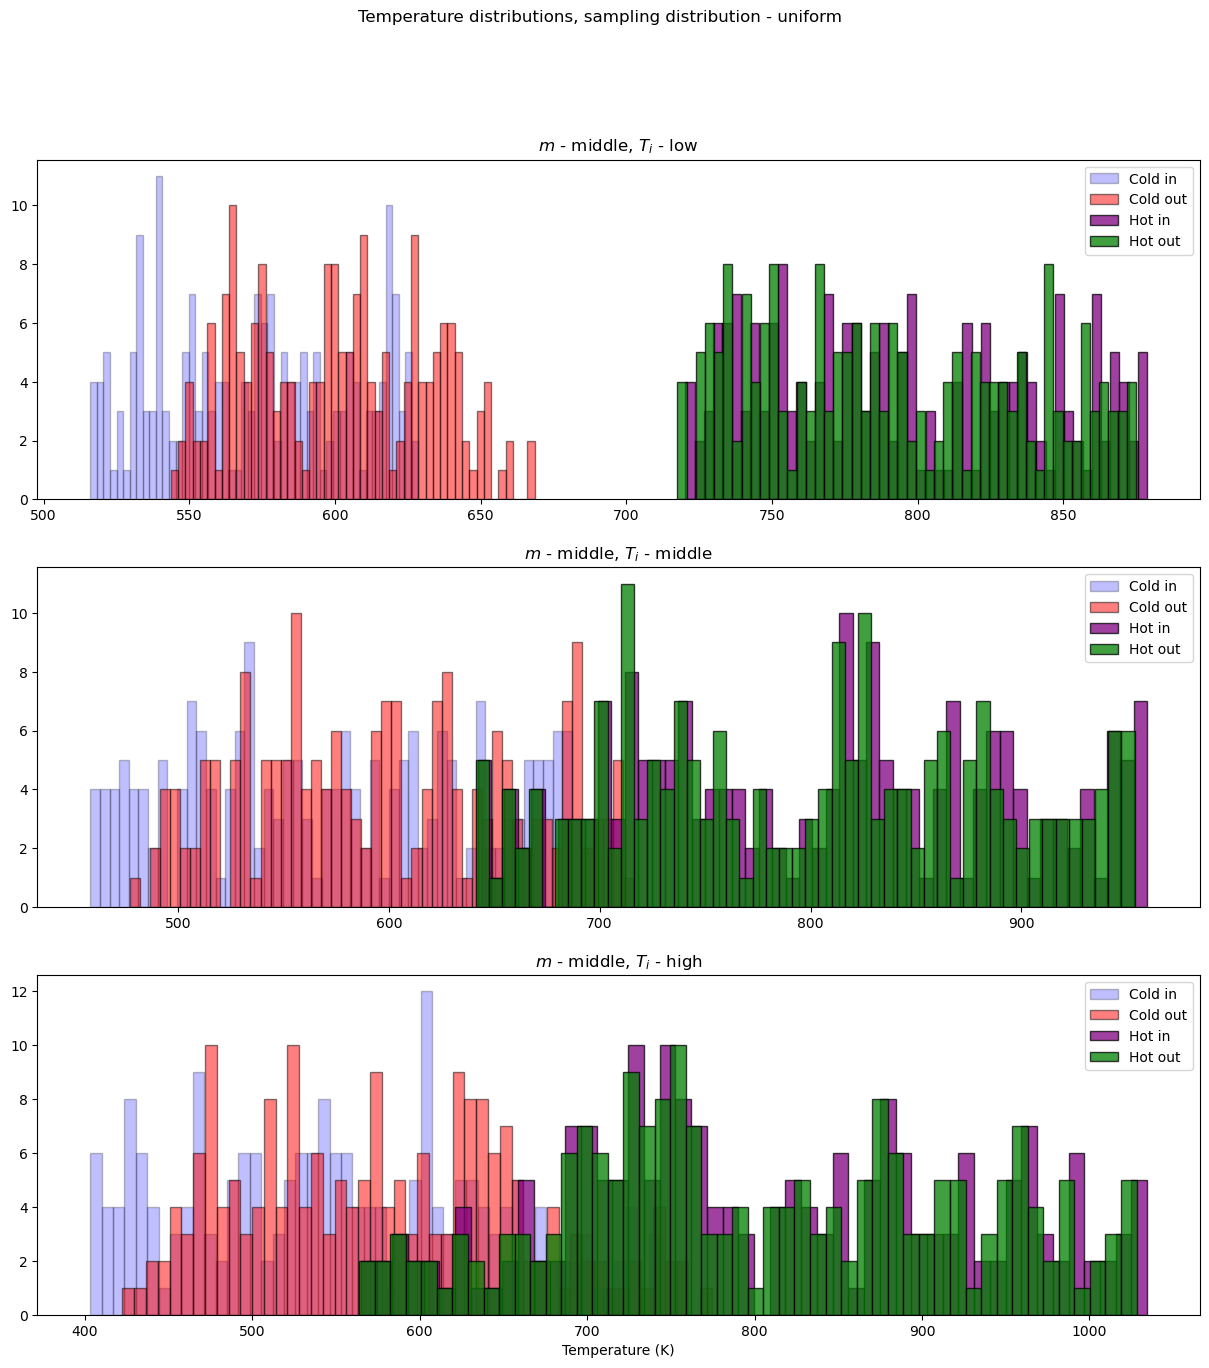

In [22]:
# Temperature distributions
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].hist(df_mMTiL["F1i"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold in")
ax[0].hist(df_mMTiL["F1o"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Cold out")
ax[0].hist(df_mMTiL["F2i"].to_numpy(), color="purple", ec="black", alpha=0.75, bins=50, label="Hot in")
ax[0].hist(df_mMTiL["F2o"].to_numpy(), color="green", ec="black", alpha=0.75, bins=50, label="Hot out")
ax[0].set_title("$m$ - middle, $T_{i}$ - low")
ax[0].legend(loc="upper right")

ax[1].hist(df_mMTiM["F1i"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold in")
ax[1].hist(df_mMTiM["F1o"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Cold out")
ax[1].hist(df_mMTiM["F2i"].to_numpy(), color="purple", ec="black", alpha=0.75, bins=50, label="Hot in")
ax[1].hist(df_mMTiM["F2o"].to_numpy(), color="green", ec="black", alpha=0.75, bins=50, label="Hot out")
ax[1].set_title("$m$ - middle, $T_{i}$ - middle")
ax[1].legend(loc="upper right")

ax[2].hist(df_mMTiH["F1i"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold in")
ax[2].hist(df_mMTiH["F1o"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Cold out")
ax[2].hist(df_mMTiH["F2i"].to_numpy(), color="purple", ec="black", alpha=0.75, bins=50, label="Hot in")
ax[2].hist(df_mMTiH["F2o"].to_numpy(), color="green", ec="black", alpha=0.75, bins=50, label="Hot out")
ax[2].set_title("$m$ - middle, $T_{i}$ - high")
ax[2].legend(loc="upper right")
ax[2].set_xlabel("Temperature (K)")

plt.suptitle(f'Temperature distributions, sampling distribution - {ran_mode}')
plt.show()

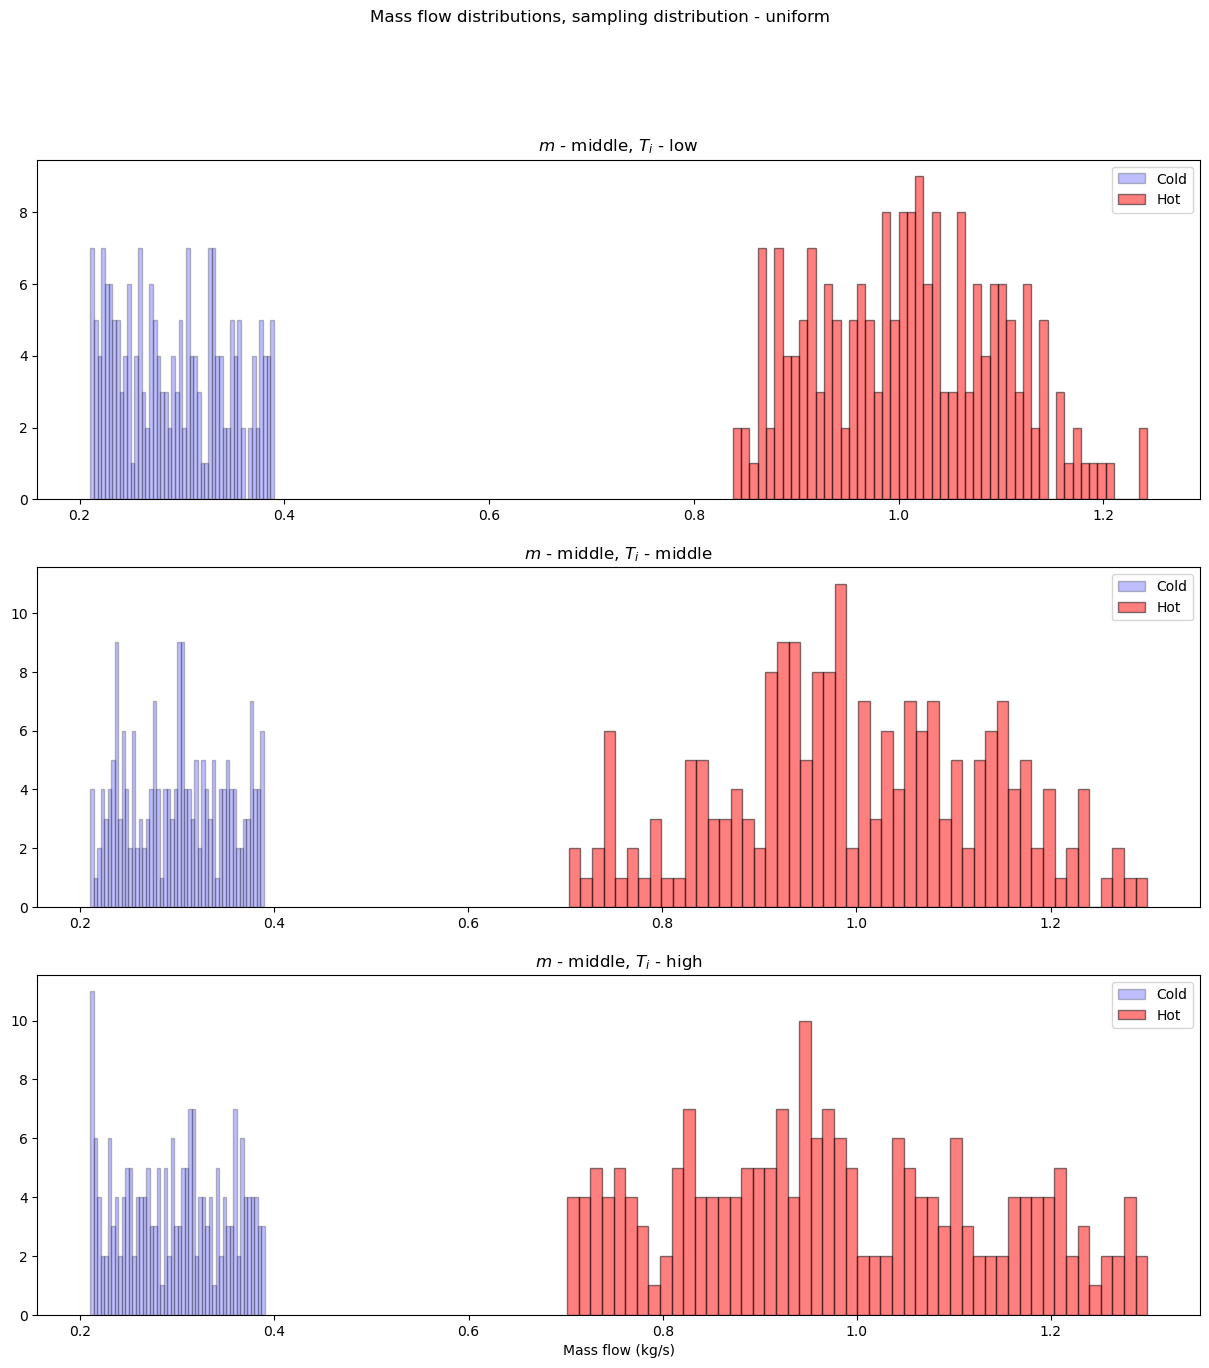

In [23]:
# mass flow distribution
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].hist(df_mMTiL["F1m"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold")
ax[0].hist(df_mMTiL["F2m"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Hot")
ax[0].set_title("$m$ - middle, $T_{i}$ - low")
ax[0].legend(loc="upper right")

ax[1].hist(df_mMTiM["F1m"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold")
ax[1].hist(df_mMTiM["F2m"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Hot")
ax[1].set_title("$m$ - middle, $T_{i}$ - middle")
ax[1].legend(loc="upper right")

ax[2].hist(df_mMTiH["F1m"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold")
ax[2].hist(df_mMTiH["F2m"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Hot")
ax[2].set_title("$m$ - middle, $T_{i}$ - high")
ax[2].legend(loc="upper right")
ax[2].set_xlabel("Mass flow (kg/s)")

plt.suptitle(f'Mass flow distributions, sampling distribution - {ran_mode}')
plt.show()

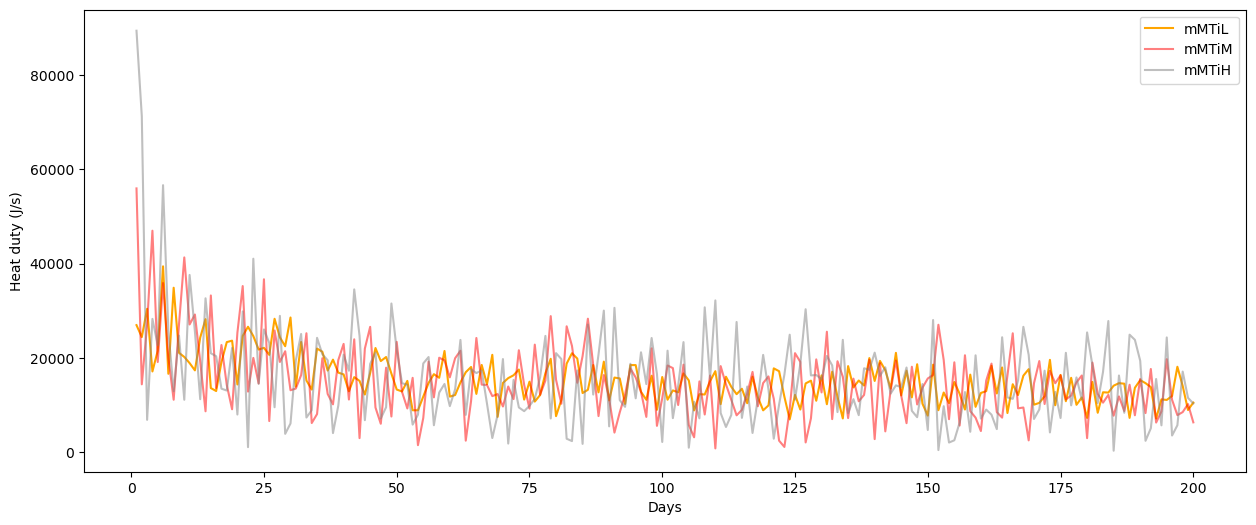

In [24]:
# Heat duty vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mMTiL["Q"].to_numpy(), c="orange", alpha=1, label="mMTiL")
ax.plot(days, df_mMTiM["Q"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mMTiH["Q"].to_numpy(), c="grey", alpha=0.5, label="mMTiH")
ax.set_ylabel("Heat duty (J/s)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

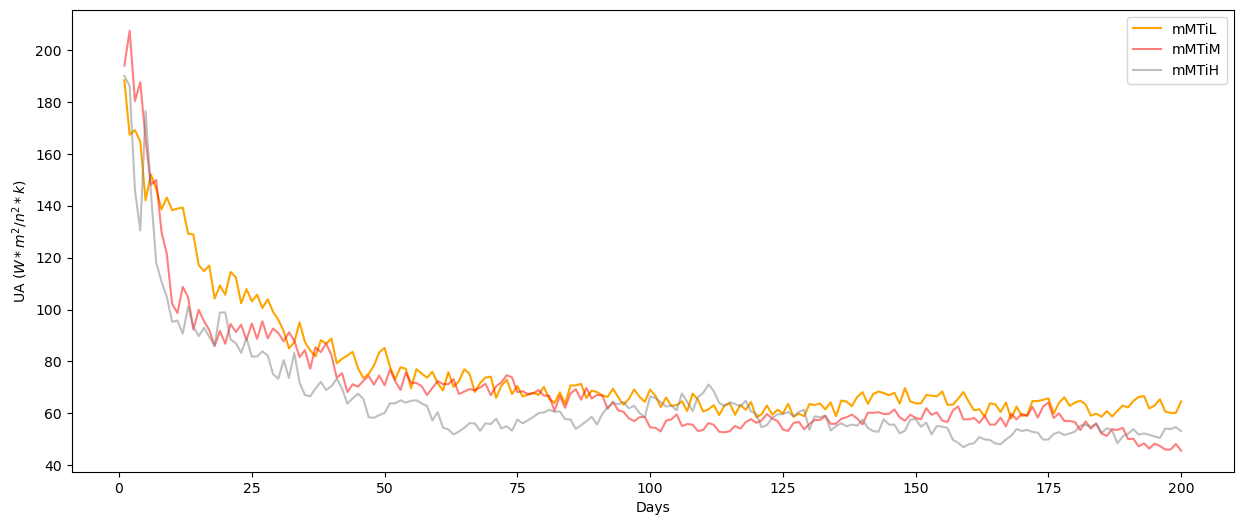

In [25]:
# UA vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mMTiL["UA"].to_numpy(), c="orange", alpha=1, label="mMTiL")
ax.plot(days, df_mMTiM["UA"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mMTiH["UA"].to_numpy(), c="grey", alpha=0.5, label="mMTiH")
ax.set_ylabel("UA ($W*m^2/n^2*k$)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

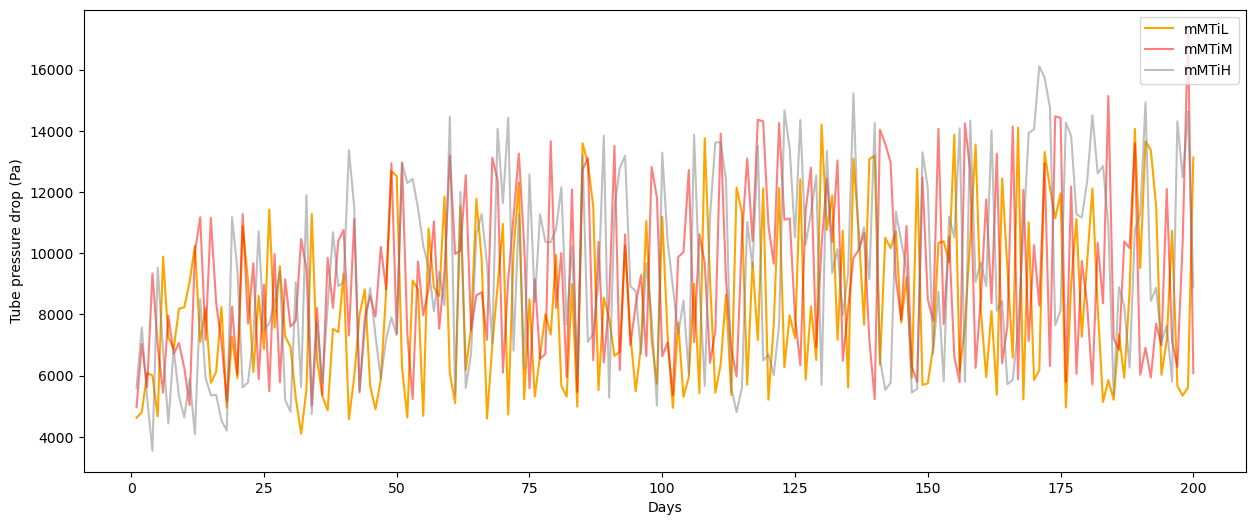

In [26]:
# Pressure drop vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mMTiL["dP1"].to_numpy(), c="orange", alpha=1, label="mMTiL")
ax.plot(days, df_mMTiM["dP1"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mMTiH["dP1"].to_numpy(), c="grey", alpha=0.5, label="mMTiH")
ax.set_ylabel("Tube pressure drop (Pa)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

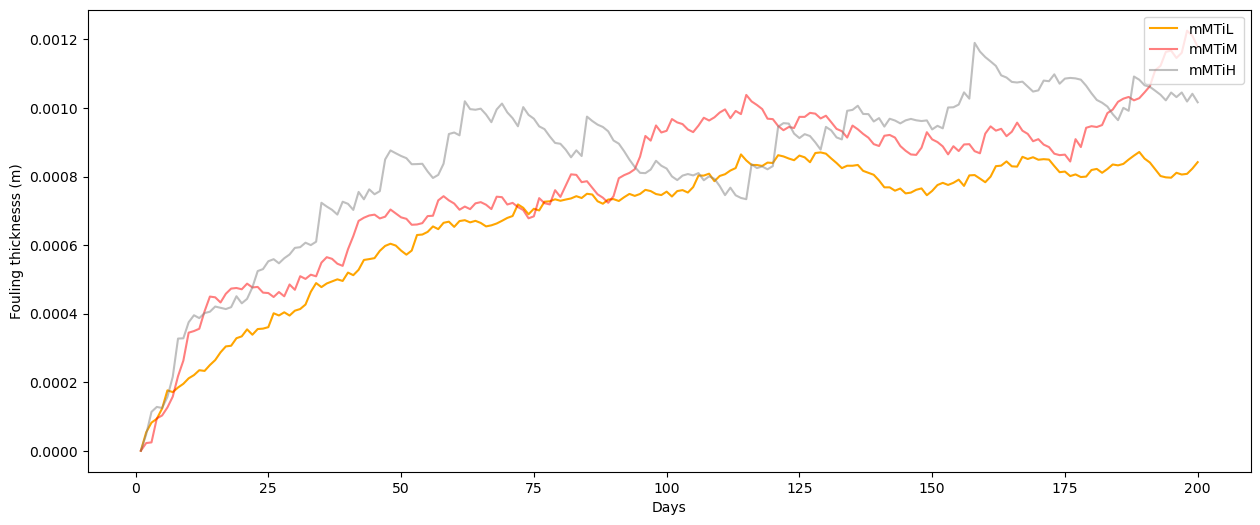

In [27]:
# Fouling thickness vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mMTiL["Sigma1"].to_numpy(), c="orange", alpha=1, label="mMTiL")
ax.plot(days, df_mMTiM["Sigma1"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mMTiH["Sigma1"].to_numpy(), c="grey", alpha=0.5, label="mMTiH")
ax.set_ylabel("Fouling thicknesss (m)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

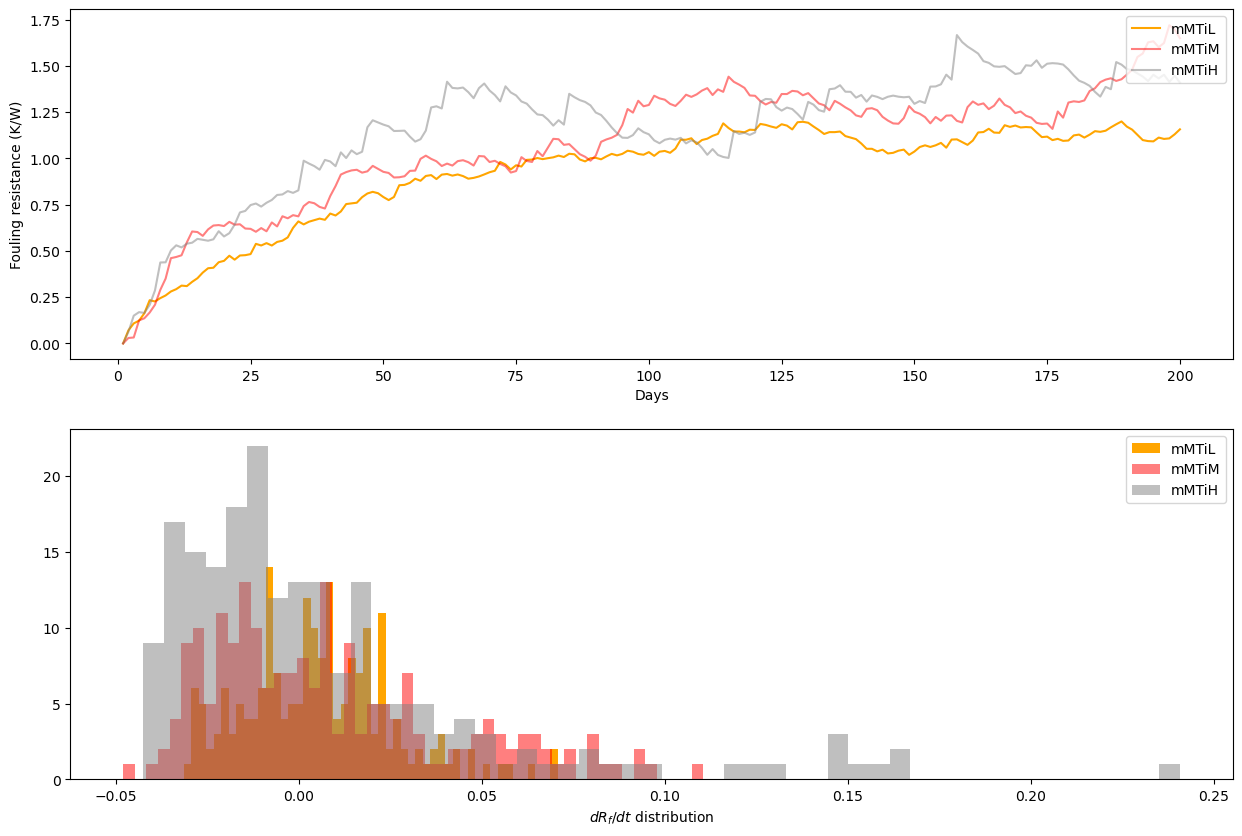

In [28]:
# Fouling resistance vs. time
fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0].plot(days, df_mMTiL["Rf1"].to_numpy(), c="orange", alpha=1, label="mMTiL")
ax[0].plot(days, df_mMTiM["Rf1"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax[0].plot(days, df_mMTiH["Rf1"].to_numpy(), c="grey", alpha=0.5, label="mMTiH")
ax[0].set_ylabel("Fouling resistance (K/W)")
ax[0].set_xlabel("Days")
ax[0].legend(loc="upper right")

# distribution of dRf/dt
ax[1].hist(df_mMTiL["Rf1"][1:].to_numpy() - df_mMTiL["Rf1"][:-1].to_numpy(), color="orange", alpha=1, label="mMTiL", bins=50)
ax[1].hist(df_mMTiM["Rf1"][1:].to_numpy() - df_mMTiM["Rf1"][:-1].to_numpy(), color="red", alpha=0.5, label="mMTiM", bins=50)
ax[1].hist(df_mMTiH["Rf1"][1:].to_numpy() - df_mMTiH["Rf1"][:-1].to_numpy(), color="grey", alpha=0.5, label="mMTiH", bins=50)
ax[1].set_xlabel("$dR_{f}/dt$ distribution")
ax[1].legend(loc="upper right")

plt.show()

### 3.Make plots - constant middle uncertainty (M) for $T_{i}$

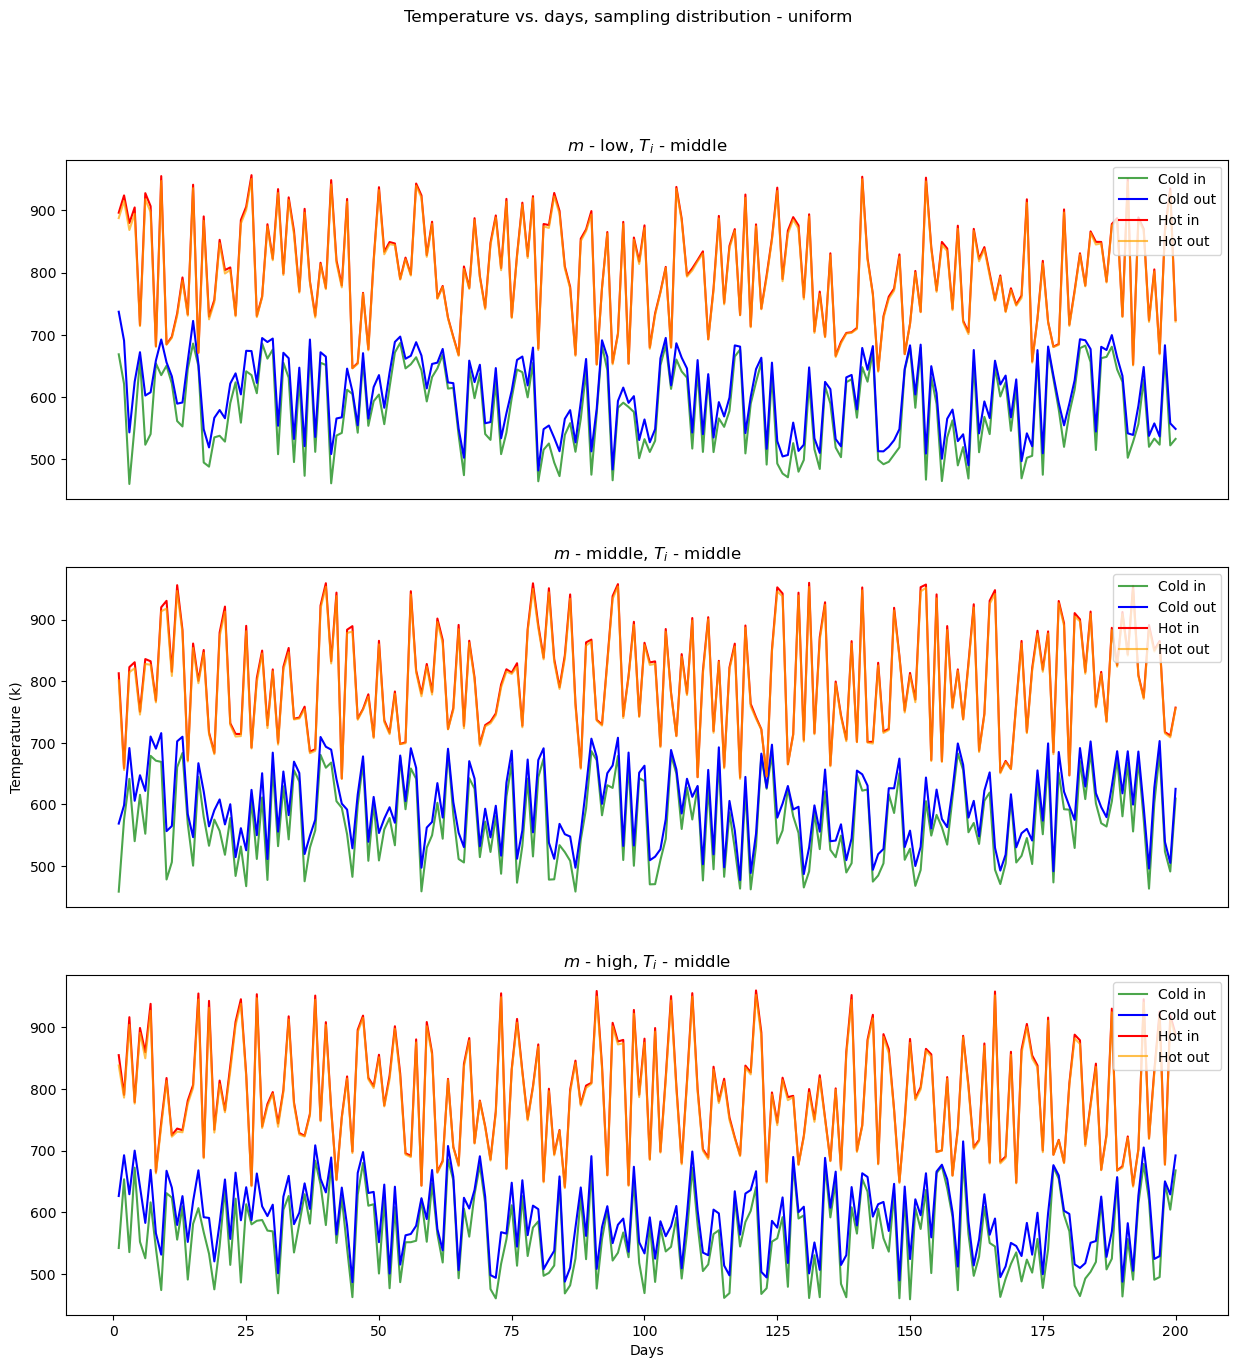

In [29]:
# Temperatures vs. time
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].plot(days, df_mLTiM["F1i"].to_numpy(), c="green", alpha = 0.7, label="Cold in")
ax[0].plot(days, df_mLTiM["F1o"].to_numpy(), c="blue", label="Cold out")
ax[0].plot(days, df_mLTiM["F2i"].to_numpy(), c="red", label="Hot in")
ax[0].plot(days, df_mLTiM["F2o"].to_numpy(), c="orange", alpha=0.7, label="Hot out")
ax[0].set_title("$m$ - low, $T_{i}$ - middle")
ax[0].set_xticks([])
ax[0].legend(loc="upper right")

ax[1].plot(days, df_mMTiM["F1i"].to_numpy(), c="green", alpha = 0.7, label="Cold in")
ax[1].plot(days, df_mMTiM["F1o"].to_numpy(), c="blue", label="Cold out")
ax[1].plot(days, df_mMTiM["F2i"].to_numpy(), c="red", label="Hot in")
ax[1].plot(days, df_mMTiM["F2o"].to_numpy(), c="orange", alpha=0.7, label="Hot out")
ax[1].set_title("$m$ - middle, $T_{i}$ - middle")
ax[1].set_xticks([])
ax[1].legend(loc="upper right")

ax[2].plot(days, df_mHTiM["F1i"].to_numpy(), c="green", alpha = 0.7, label="Cold in")
ax[2].plot(days, df_mHTiM["F1o"].to_numpy(), c="blue", label="Cold out")
ax[2].plot(days, df_mHTiM["F2i"].to_numpy(), c="red", label="Hot in")
ax[2].plot(days, df_mHTiM["F2o"].to_numpy(), c="orange", alpha=0.7, label="Hot out")
ax[2].set_title("$m$ - high, $T_{i}$ - middle")
ax[2].legend(loc="upper right")

ax[1].set_ylabel("Temperature (k)")
ax[2].set_xlabel("Days")

plt.suptitle(f'Temperature vs. days, sampling distribution - {ran_mode}')
plt.show()

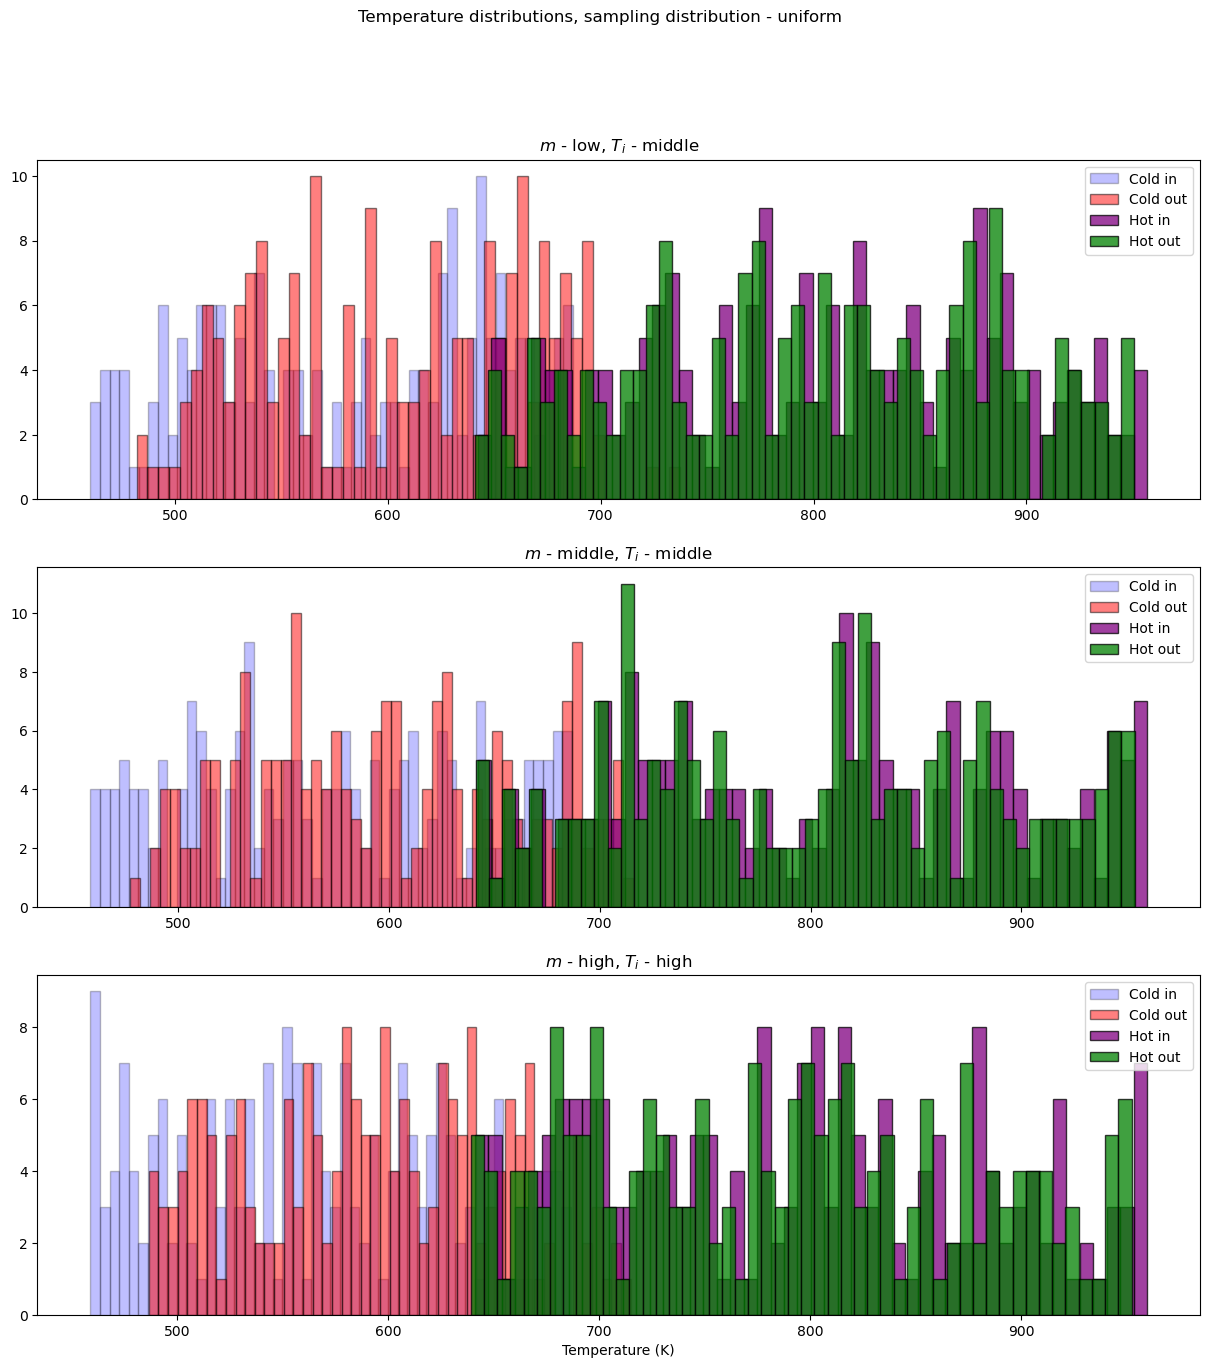

In [30]:
# Temperature distributions
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].hist(df_mLTiM["F1i"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold in")
ax[0].hist(df_mLTiM["F1o"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Cold out")
ax[0].hist(df_mLTiM["F2i"].to_numpy(), color="purple", ec="black", alpha=0.75, bins=50, label="Hot in")
ax[0].hist(df_mLTiM["F2o"].to_numpy(), color="green", ec="black", alpha=0.75, bins=50, label="Hot out")
ax[0].set_title("$m$ - low, $T_{i}$ - middle")
ax[0].legend(loc="upper right")

ax[1].hist(df_mMTiM["F1i"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold in")
ax[1].hist(df_mMTiM["F1o"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Cold out")
ax[1].hist(df_mMTiM["F2i"].to_numpy(), color="purple", ec="black", alpha=0.75, bins=50, label="Hot in")
ax[1].hist(df_mMTiM["F2o"].to_numpy(), color="green", ec="black", alpha=0.75, bins=50, label="Hot out")
ax[1].set_title("$m$ - middle, $T_{i}$ - middle")
ax[1].legend(loc="upper right")

ax[2].hist(df_mHTiM["F1i"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold in")
ax[2].hist(df_mHTiM["F1o"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Cold out")
ax[2].hist(df_mHTiM["F2i"].to_numpy(), color="purple", ec="black", alpha=0.75, bins=50, label="Hot in")
ax[2].hist(df_mHTiM["F2o"].to_numpy(), color="green", ec="black", alpha=0.75, bins=50, label="Hot out")
ax[2].set_title("$m$ - high, $T_{i}$ - high")
ax[2].legend(loc="upper right")
ax[2].set_xlabel("Temperature (K)")

plt.suptitle(f'Temperature distributions, sampling distribution - {ran_mode}')
plt.show()

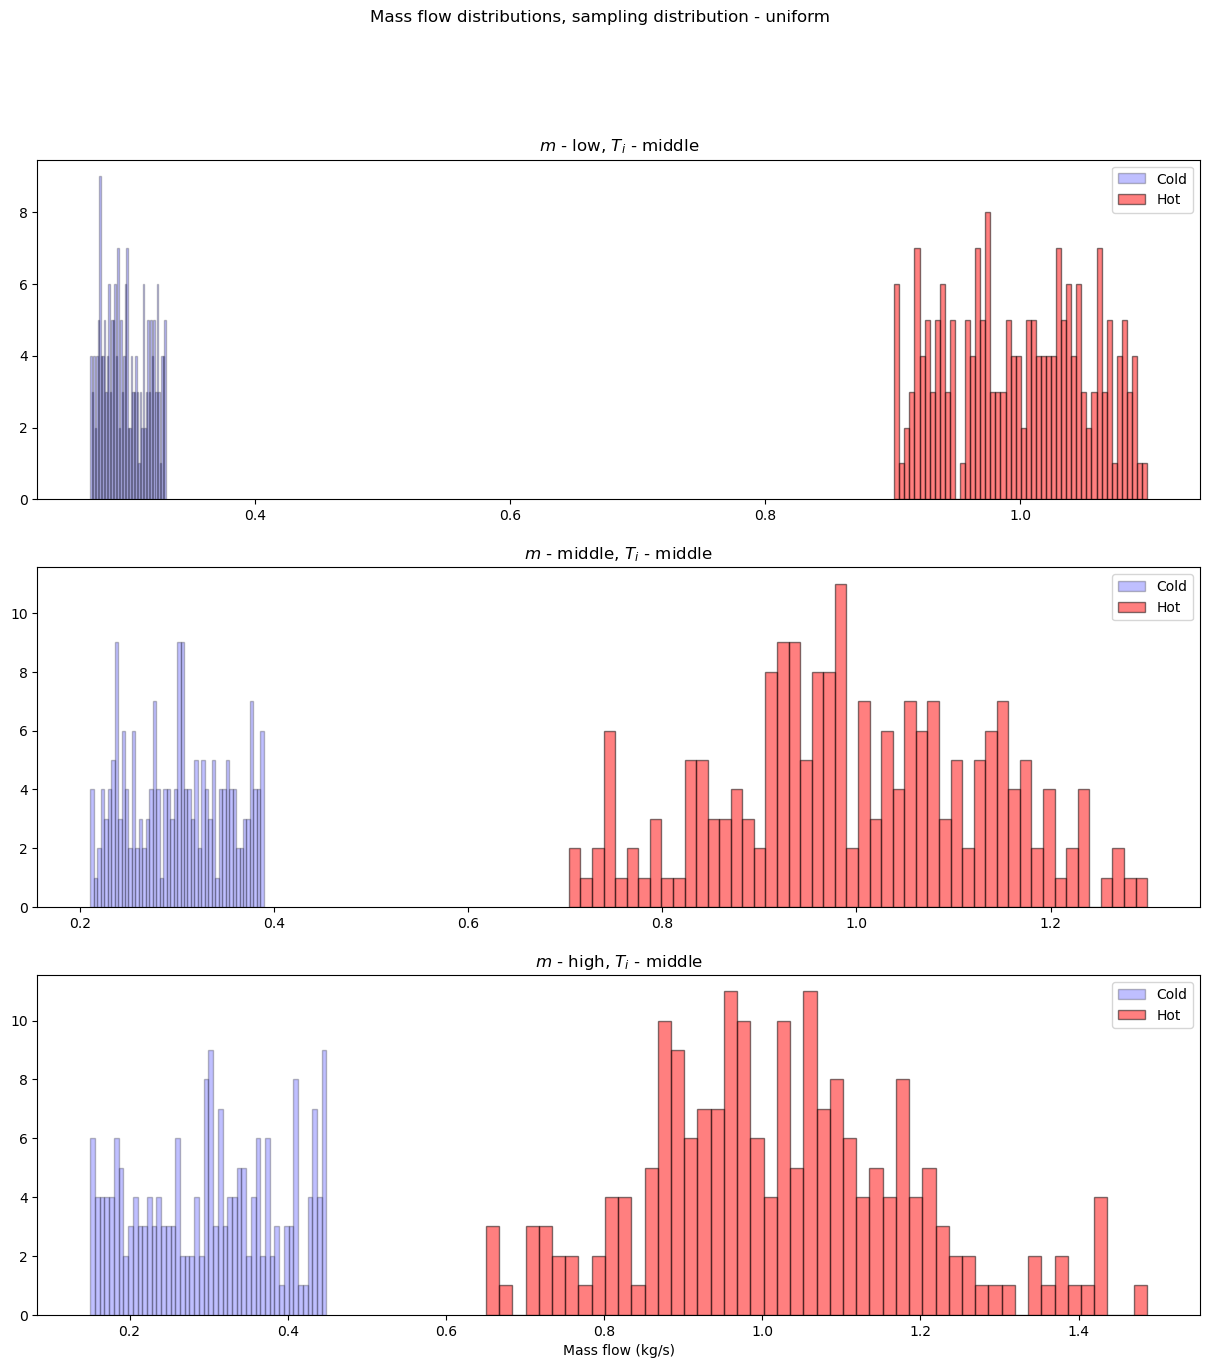

In [31]:
# mass flow distribution
fig, ax = plt.subplots(3, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0].hist(df_mLTiM["F1m"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold")
ax[0].hist(df_mLTiM["F2m"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Hot")
ax[0].set_title("$m$ - low, $T_{i}$ - middle")
ax[0].legend(loc="upper right")

ax[1].hist(df_mMTiM["F1m"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold")
ax[1].hist(df_mMTiM["F2m"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Hot")
ax[1].set_title("$m$ - middle, $T_{i}$ - middle")
ax[1].legend(loc="upper right")

ax[2].hist(df_mHTiM["F1m"].to_numpy(), color="blue", ec="black", alpha=0.25, bins=50, label="Cold")
ax[2].hist(df_mHTiM["F2m"].to_numpy(), color="red", ec="black", alpha=0.5, bins=50, label="Hot")
ax[2].set_title("$m$ - high, $T_{i}$ - middle")
ax[2].legend(loc="upper right")
ax[2].set_xlabel("Mass flow (kg/s)")

plt.suptitle(f'Mass flow distributions, sampling distribution - {ran_mode}')
plt.show()

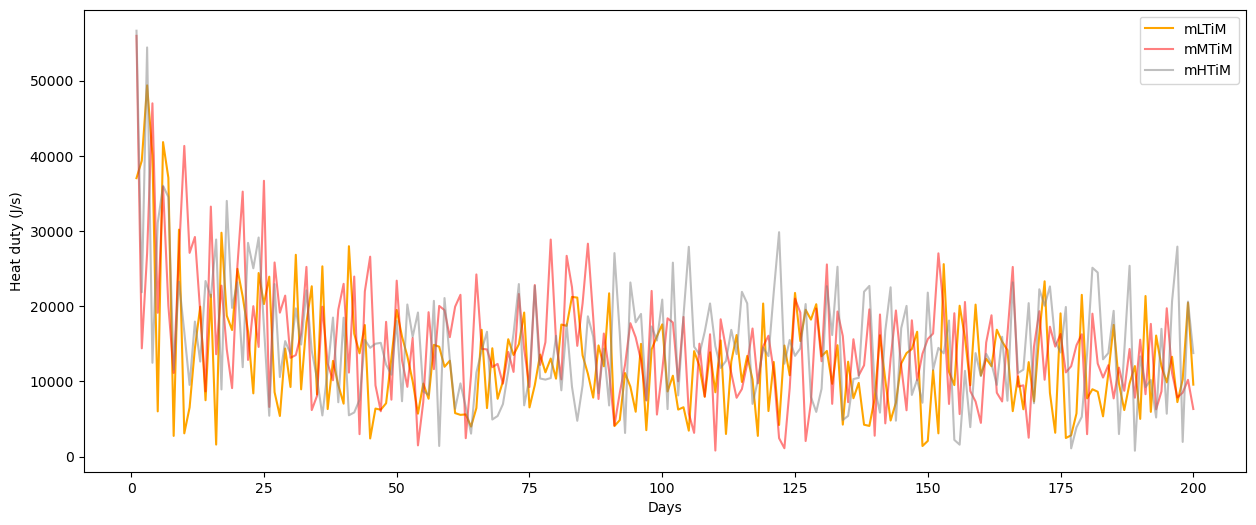

In [32]:
# Heat duty vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mLTiM["Q"].to_numpy(), c="orange", alpha=1, label="mLTiM")
ax.plot(days, df_mMTiM["Q"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mHTiM["Q"].to_numpy(), c="grey", alpha=0.5, label="mHTiM")
ax.set_ylabel("Heat duty (J/s)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

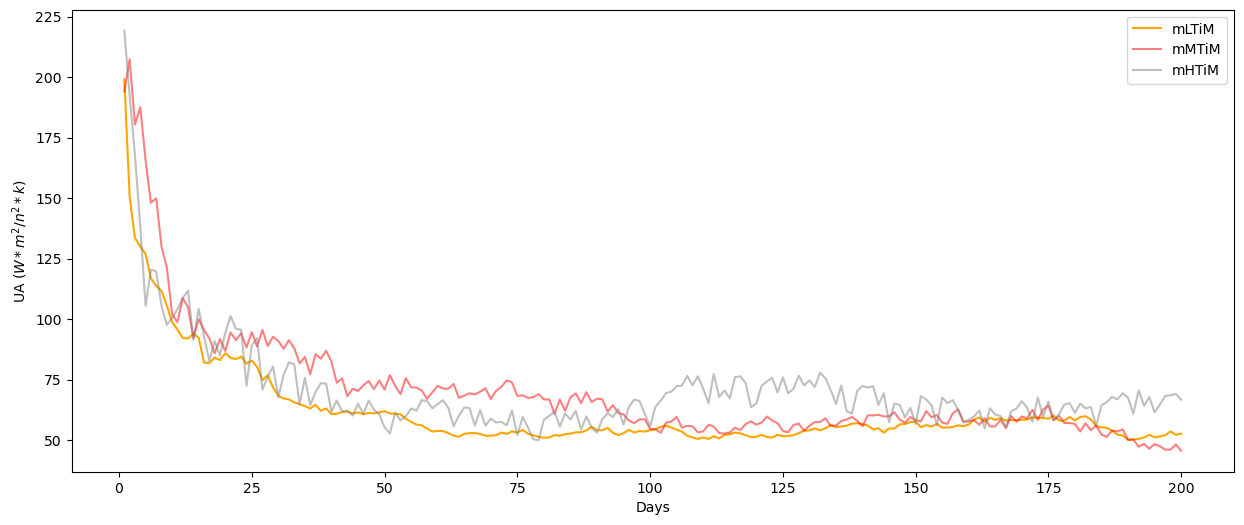

In [33]:
# UA vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mLTiM["UA"].to_numpy(), c="orange", alpha=1, label="mLTiM")
ax.plot(days, df_mMTiM["UA"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mHTiM["UA"].to_numpy(), c="grey", alpha=0.5, label="mHTiM")
ax.set_ylabel("UA ($W*m^2/n^2*k$)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

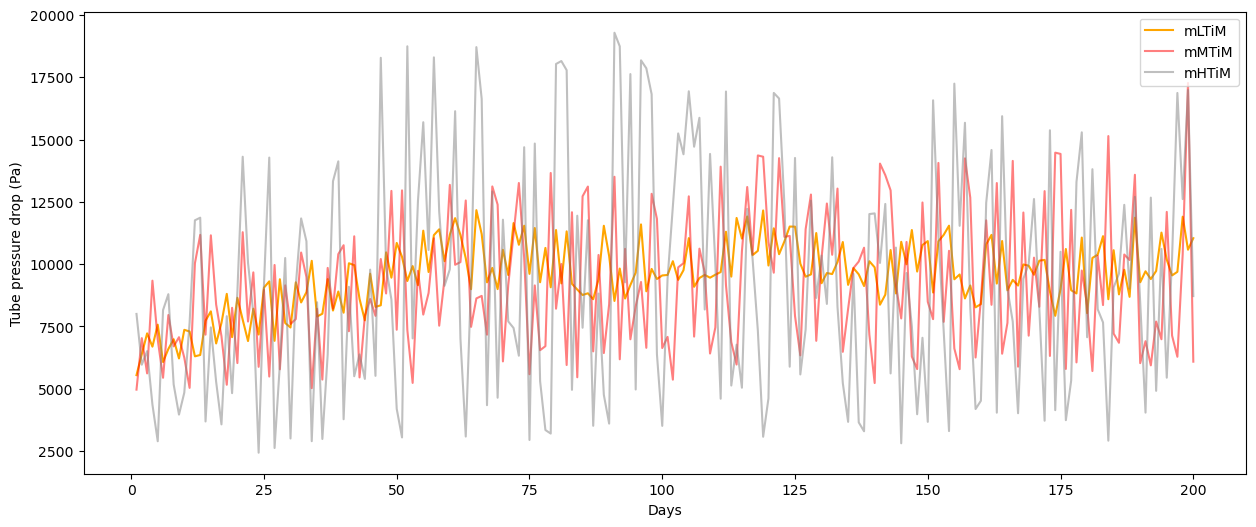

In [34]:
# Pressure drop vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mLTiM["dP1"].to_numpy(), c="orange", alpha=1, label="mLTiM")
ax.plot(days, df_mMTiM["dP1"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mHTiM["dP1"].to_numpy(), c="grey", alpha=0.5, label="mHTiM")
ax.set_ylabel("Tube pressure drop (Pa)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

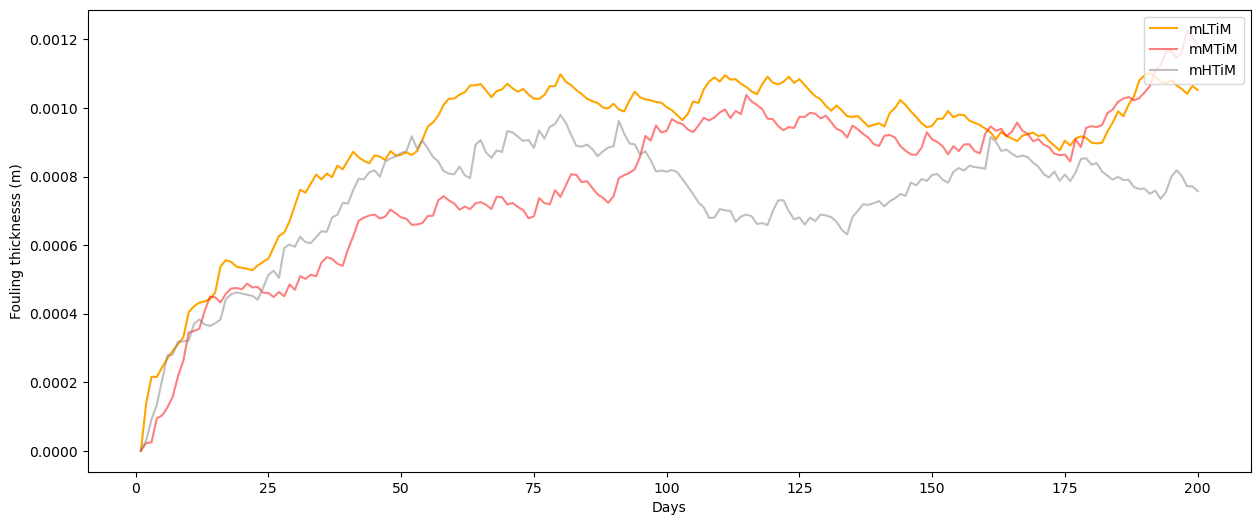

In [35]:
# Fouling thickness vs. time
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(15)
ax.plot(days, df_mLTiM["Sigma1"].to_numpy(), c="orange", alpha=1, label="mLTiM")
ax.plot(days, df_mMTiM["Sigma1"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax.plot(days, df_mHTiM["Sigma1"].to_numpy(), c="grey", alpha=0.5, label="mHTiM")
ax.set_ylabel("Fouling thicknesss (m)")
ax.set_xlabel("Days")
ax.legend(loc="upper right")

plt.show()

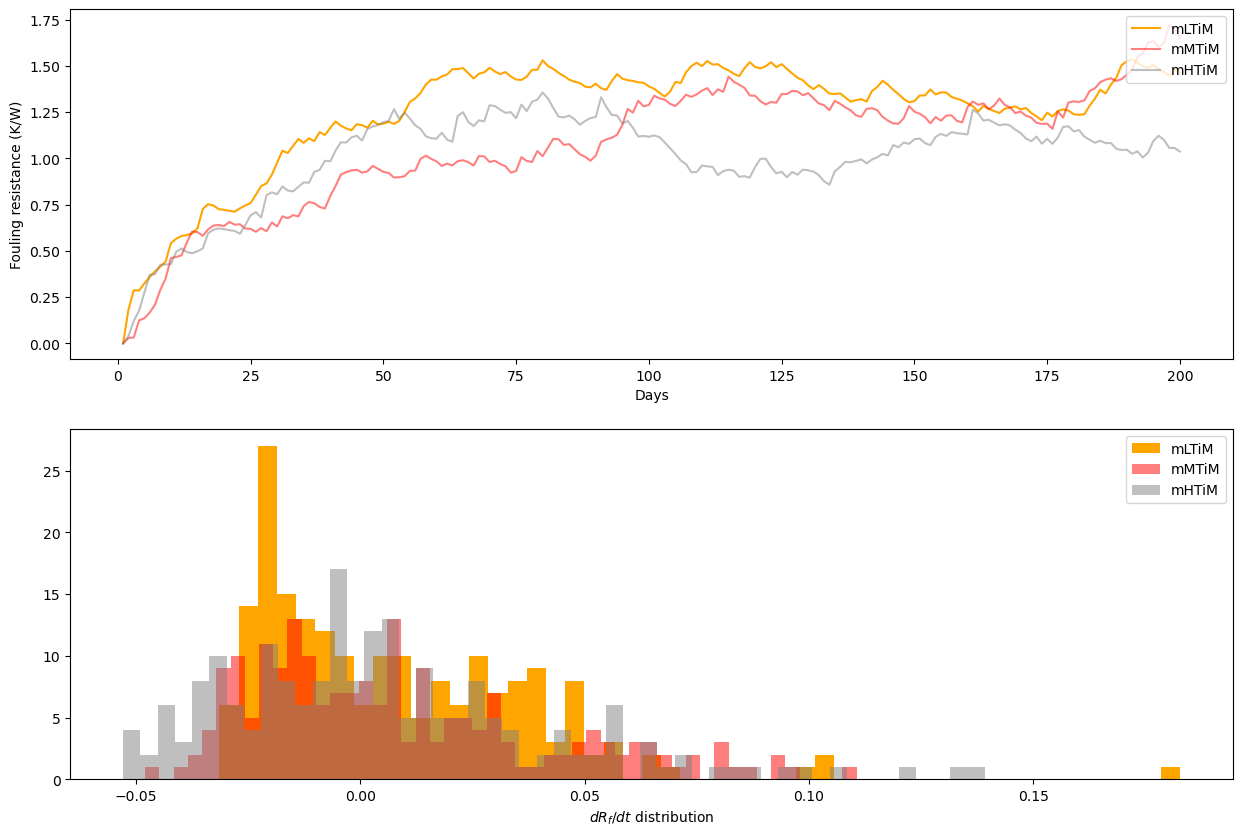

In [36]:
# Fouling resistance vs. time
fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
ax[0].plot(days, df_mLTiM["Rf1"].to_numpy(), c="orange", alpha=1, label="mLTiM")
ax[0].plot(days, df_mMTiM["Rf1"].to_numpy(), c="red", alpha=0.5, label="mMTiM")
ax[0].plot(days, df_mHTiM["Rf1"].to_numpy(), c="grey", alpha=0.5, label="mHTiM")
ax[0].set_ylabel("Fouling resistance (K/W)")
ax[0].set_xlabel("Days")
ax[0].legend(loc="upper right")

# distribution of dRf/dt
ax[1].hist(df_mLTiM["Rf1"][1:].to_numpy() - df_mLTiM["Rf1"][:-1].to_numpy(), color="orange", alpha=1, label="mLTiM", bins=50)
ax[1].hist(df_mMTiM["Rf1"][1:].to_numpy() - df_mMTiM["Rf1"][:-1].to_numpy(), color="red", alpha=0.5, label="mMTiM", bins=50)
ax[1].hist(df_mHTiM["Rf1"][1:].to_numpy() - df_mHTiM["Rf1"][:-1].to_numpy(), color="grey", alpha=0.5, label="mHTiM", bins=50)
ax[1].set_xlabel("$dR_{f}/dt$ distribution")
ax[1].legend(loc="upper right")

plt.show()